<h1>About the data</h1>
We have a collection of nominal and ordinal data from a survey given to students.  The survey is other scored on 1 to 5 for various variables.  There are also a number of nominal responses regarding students personal lives.  There is some anticipation that the nominal data will be less subject to error as the students aren't required to grade themselves on a scale and use boolean responses, such as parents married or divorced or intend or don't intend to go to university.

The data can be downloaded from kaggle here:
https://www.kaggle.com/uciml/student-alcohol-consumption

<h1>Hypotheses</h1>
Given this set of data in regards to students grades and other life circumstances and activities we want to know how these 

We expect to see a negative relationship with the following factors:
1. Students who drink more will perform worse in school.
2. Students with mothers who work, and thus are not at home to supervise the children will perform worse in school.
3. Students who are in romantic relationships will perform worse in school.

We also expect to see a positive relationship with the following factors:
1. Students who engage in after school activites, having a more structured life, will perform better in school.
2. Students who desire to attend further education after secondary school will perform better in school.

In [1]:
import numpy as np
import pandas as pd
import scipy as scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
#df = pd.read_csv("C:\\Users\\Peter\\Desktop\\Prep Captstone\\StudentAlcohol\\student-por.csv", low_memory = False) 
df = pd.read_csv("C:\\Users\\Peter\\Desktop\\Prep Captstone\\StudentAlcohol\\student-mat.csv", low_memory = False) 

In [2]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
df.isnull().values.any()  #check for missing data

False

In [5]:
def sampleandtest(set1, set2):
    findsmall=[len(set1), len(set2)]
    smaller=min(findsmall)
    x = 5
    print("Taking a sample to make the two data sets match in size", x, "times")
    for i in range(x): 
        if smaller == len(set1):
            randomsample = set2.sample(smaller)
            randomsample.name = set2.name+" sample"
            checkp(randomsample,set1)
        else:
            randomsample = set1.sample(smaller)
            randomsample.name = set1.name+" sample"    
            checkp(randomsample,set2)
        print()

In [6]:
def checkp (type1, type2): #function to evaluate size of both dataframes and return a pvalue and statistic, either mann-whit or bayes
    
    if len(type1)/len(type2) >= 1.3:  #check to see if the number of elements in the datasets is dissimilar in size
        similar = False
    elif len(type1)/len(type2) <= 0.75: #check to see if the number of elements in the datasets is dissimilar in size
        similar = False
    else:  #if they aren't different in size they are obviously similar in size
        similar = True

    if similar == True:  #if data sets are similar in size run standard Tstatistic and pvalue test
        print('Datasets are of similar sizes (',type1.name, len(type1), 'and ',type2.name, len(type2), ') we\'ll run a STANDARD tstatistic and pvalue test')
        ptest = ttest_ind(type1['G3'], type2['G3'], equal_var=False).pvalue
        print('Bayes ', 'G3', ttest_ind(type1['G3'], type2['G3'], equal_var=False))
    else:  #if data sets are similar in size run man whitney statistic and pvalue test
        print('Datasets are of different sizes (',type1.name, len(type1), 'and ',type2.name, len(type2), ')  we\'ll run a MANN-WHITNEY statistic and pvalue test')
        ptest = scipy.stats.mannwhitneyu(type1['G3'], type2['G3']).pvalue
        print('Mann-Whitney', 'G3', scipy.stats.mannwhitneyu(type1['G3'], type2['G3']))
    if ptest > 0.05:
        print('The pvalue is greater than 0.05 indicating the null hypothesis')
    else:
        print('The pvalue is less than 0.05 so we reject the null hypothesis')

In [7]:
def histvsdata(set1,set1title, set2,set2title, plottitle,plotdata):
    plt.figure(figsize=(5,10))
    plt.subplot(2, 1, 1)
    plt.hist(set1[plotdata], label = set1title, alpha = 0.5, normed = True)
    plt.axvline(set1[plotdata].mean(), color='b', linestyle='solid', linewidth=2)
    plt.title(plottitle)
    plt.hist(set2[plotdata], label = set2title, alpha = 0.5, normed = True)
    plt.axvline(set2[plotdata].mean(), color='g', linestyle='solid', linewidth=2)
    plt.legend(loc='upper left')
    plt.show()

<h1>Analysis</h1>
Lets start with a heatmap to see what correlations we might see from the ordinal survey data.  According to our hypothesis we should see 

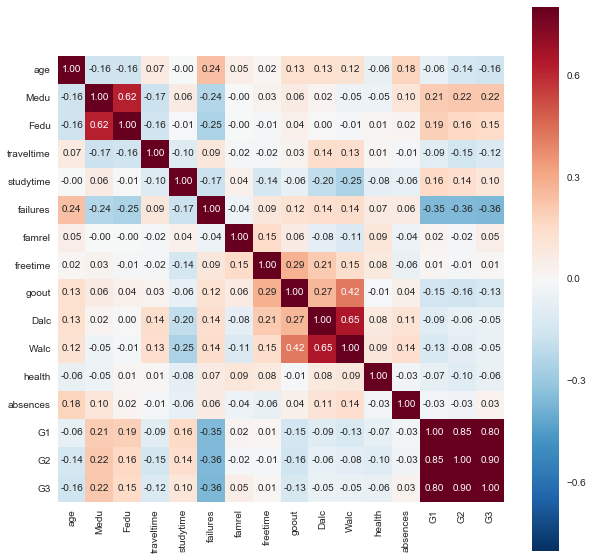

In [8]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,fmt='.2f')
plt.show()

Unforetunetly there are no obvious answers that we can get our of the data as the only strong correlations using the surveys where stundents gave answers between 1 and 5 for various questions relate to parental education and week drinking compared to weekend drinking.  So to get answers we will have to look at the questions that weren't ranked 1-5.  The lack of information we are getting out of the survey scale questions could be a result of students not ranking the categories honestly or not really knowing how to compare themselves to other people.  However, it is surprising that drinking doesn't seem to affect student performance, so before we go futher lets take a look at the data on this a little more deeply.

In [9]:
df['Dalc'].unique()

array([1, 2, 5, 3, 4], dtype=int64)

In [10]:
df['Dalc'].mean()

1.481012658227848

In [34]:
drinksaboveavg = df[df['Dalc']>=df['Dalc'].mean()]
drinksaboveavg.name = 'drinksaboveavg'
drinksbelowavg = df[df['Dalc']<df['Dalc'].mean()]
drinksbelowavg.name = 'drinksbelowavg'
checkp(drinksbelowavg,drinksaboveavg)

Datasets are of different sizes ( drinksbelowavg 276 and  drinksaboveavg 119 )  we'll run a MAN WHITNEY statistic and pvalue test
ManWhit G3 MannwhitneyuResult(statistic=13763.5, pvalue=0.0051761234196521753)
The pvalue is less than 0.05 so we reject the null hypothesis


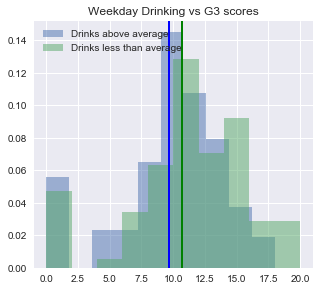

In [36]:
histvsdata(drinksaboveavg, 'Drinks above average', 
         drinksbelowavg, 'Drinks less than average', 
         'Weekday Drinking vs G3 scores',
        'G3')

From the Mann-Whitney test and the means of the students responses above their drinking habits we can conclude that drinking during the week negatively affects school performance.  The historgram also suggests that students who don't drink do better in school than those who do.  

The next hypothesis we had was that students with mothers who work will not perform in school as well due to a lack of parental supervision at home.  Let's investigate this date.  As the data on this is nominal we can't make any initial assumptions from a heatmap on this so well have to start with the Mann-Whitney test.

In [15]:
df['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [37]:
stayathomemom = df[df['Mjob']=='at_home'] #create a dataframe of students where the mother is a stay at home mom
stayathomemom.name = 'stayathomemom'
notstayathomemom = df[df['Mjob']!='at_home'] #create a dataframe of students where the mother is a working mom
notstayathomemom.name = 'notstayathomemom'

checkp(stayathomemom,notstayathomemom)    #checks for correlations of pvalues that at less than 0.01 suggesting intesting data

Datasets are of different sizes ( stayathomemom 59 and  notstayathomemom 336 )  we'll run a MAN WHITNEY statistic and pvalue test
ManWhit G3 MannwhitneyuResult(statistic=8056.5, pvalue=0.010636795350218518)
The pvalue is less than 0.05 so we reject the null hypothesis


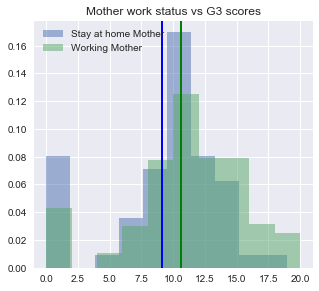

In [18]:
histvsdata(stayathomemom, 'Stay at home Mother', 
         notstayathomemom, 'Working Mother', 
         'Mother work status vs G3 scores',
          'G3')

The Mann-Whitney test suggests correlation between a mothers working status and a students performance in school.  However, unexpectedly, students with mothers who work do better in school than students whose mothers stay at home.  It seems that rather than being home to monitor the students behavior that students do better in school when their mothers are a working role model. 

Student personal life seems to be affecting student school performance differetly than we expected.  We expected a positive relationship from having the structure of after school activities, lets see if we were right.

In [19]:
df['activities'].unique()

array(['no', 'yes'], dtype=object)

In [38]:
aftrschlactive = df[df['activities']=='yes']  #create a dataframe where students have after school activities
aftrschlactive.name = 'aftrschlactive'
noaftrschlactive = df[df['activities']=='no'] #create a dataframe where students dont have after school activities
noaftrschlactive.name = 'noaftrschlactive'

checkp(aftrschlactive,noaftrschlactive)  #checks for correlations of pvalues that at less than 0.01 suggesting intesting data

Datasets are of similar sizes ( aftrschlactive 201 and  noaftrschlactive 194 ) we'll run a STANDARD tstatistic and pvalue test
Bayes  G3 Ttest_indResult(statistic=0.3194427846668576, pvalue=0.74956051299100235)
The pvalue is greater than 0.05 indicating the null hypothesis


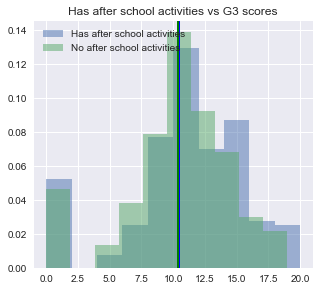

In [22]:
histvsdata(aftrschlactive, 'Has after school activities', 
         noaftrschlactive, 'No after school activities', 
         'Has after school activities vs G3 scores',
        'G3')

Much like with working mothers we are surprised to see after school activities also seem to have no impact on student performance.  Null hypothosis accepted.

In [23]:
df['romantic'].unique()

array(['no', 'yes'], dtype=object)

In [40]:
romantic = df[df['romantic']=='yes']  #create a dataframe where students have romantic relationships
romantic.name = 'romantic'
noromantic = df[df['romantic']=='no'] #create a dataframe where students dont have romantic relationships
noromantic.name = 'noromantic'

checkp(romantic,noromantic)  #checks for correlations of pvalues that at less than 0.01 suggesting intesting data

Datasets are of different sizes ( romantic 132 and  noromantic 263 )  we'll run a MAN WHITNEY statistic and pvalue test
ManWhit G3 MannwhitneyuResult(statistic=15423.0, pvalue=0.034764992940804075)
The pvalue is less than 0.05 so we reject the null hypothesis


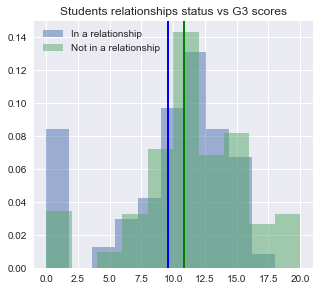

In [26]:
histvsdata(romantic, 'In a relationship', 
         noromantic, 'Not in a relationship', 
         'Students relationships status vs G3 scores',
        'G3')

Parents the world over will feel justified in not liking their childs boyfriend/girlfriend.  Not only are children in relationships less likely to do well in school, but the rate of failure in school for students with significant others is far higher than those without. Overally we can see from the Mann-Whitney test and the means that students not in a romantic relationship do better than those in a relationship.


In [27]:
df['higher'].unique()

array(['yes', 'no'], dtype=object)

In [41]:
wantshigher = df[df['higher']=='yes']  #create a dataframe where students want to get higher education
wantshigher.name = 'wantshigher'
nohigherdesire = df[df['higher']=='no'] #create a dataframe where students dont want to get higher education
nohigherdesire.name = 'nohigherdesire'

checkp(wantshigher,nohigherdesire)  #checks for correlations of pvalues that at less than 0.01 suggesting intesting data

Datasets are of different sizes ( wantshigher 375 and  nohigherdesire 20 )  we'll run a MAN WHITNEY statistic and pvalue test
ManWhit G3 MannwhitneyuResult(statistic=2054.5, pvalue=0.00031151174435305943)
The pvalue is less than 0.05 so we reject the null hypothesis


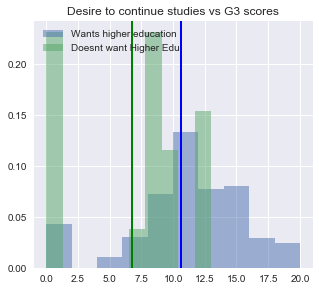

In [30]:
histvsdata(wantshigher, 'Wants higher education', 
         nohigherdesire, 'Doesnt want Higher Edu', 
         'Desire to continue studies vs G3 scores',
        'G3')

This is probably the strongest metric we have seen so far, students who want to continue going to school after secondary school are more likely to succeed than students who dont, which is common sense.  Students who want to do well will try harder, regardless of what their survey responses say the amount they drink or the amount of free time they have.

<h1> Conclusion</h1>
So to recap, here are our original hypotheses, followed by our conclutions from the results.

1. Students who drink more will perform worse in school.
    <p>POSITIVE RESULT:We found that students who drink during the week do worse in school than students who dont. Null hypothesis rejected.
2. Students with mothers who work, and thus are not at home to supervise the children will perform worse in school.
    <p>OPPOSITE RESULT:We were incorrect.  The opposite was true.  Students with working mothers performed better in school.  
3. Students who are in romantic relationships will perform worse in school.
    <p>POSITIVE RESULT: Students in relationships perform significantly worse in school than students not in a relationship.

We also expect to see a positive relationship with the following factors:
1. Students who engage in after school activites, having a more structured life, will perform better in school.
    <p>NULL RESULT:There was almost no correlation between after school activities and either negative or positive performance.  Null hypothesis accepted.
2. Students who desire to attend further education after secondary school will perform better in school.
    <p>POSITIVE RESULT:We found an overwhelmingly positive correlation between the desire to attend more school after completing secondary school with higher performance in class.  

Considering how wrong all of our initial theories were it would be worthwhile to look at all the other possible nominal data to find other potential surprising correlations.